<a href="https://colab.research.google.com/github/FMurunga/Titanic-Exploratory-Data-Analysis/blob/main/Titanic_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,10)

In [ ]:
from seaborn import load_dataset
#titanic dataset
data =pd.read_csv('https://raw.github.com/FMurunga/DataScience-Projects/main/titanic%20train%20dataset.csv')
#tips dataset
tips = load_dataset("tips")

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data.shape #the data has 891 rows and 12 columns

(891, 12)

In [ ]:
#Missing values
data.isnull().sum()  #Age,cabin and embarked have missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#fill missing values?
#1.Age
mean_age= data['Age'].mean()
data['Age'].fillna(mean_age,inplace=True)

#Categorical variables: cabin and embarked
data['Cabin'].fillna('Unkown', inplace=True)
data['Embarked'].fillna('N', inplace=True)

data.isnull().sum()
#No missing values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
#Statistical represantation of the dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Unique values?
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [ ]:
#Duplicate values check
data.duplicated().sum() #there are no duplicates

0

In [ ]:
#Correlation between columns check
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


Exploratory Data analysis


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


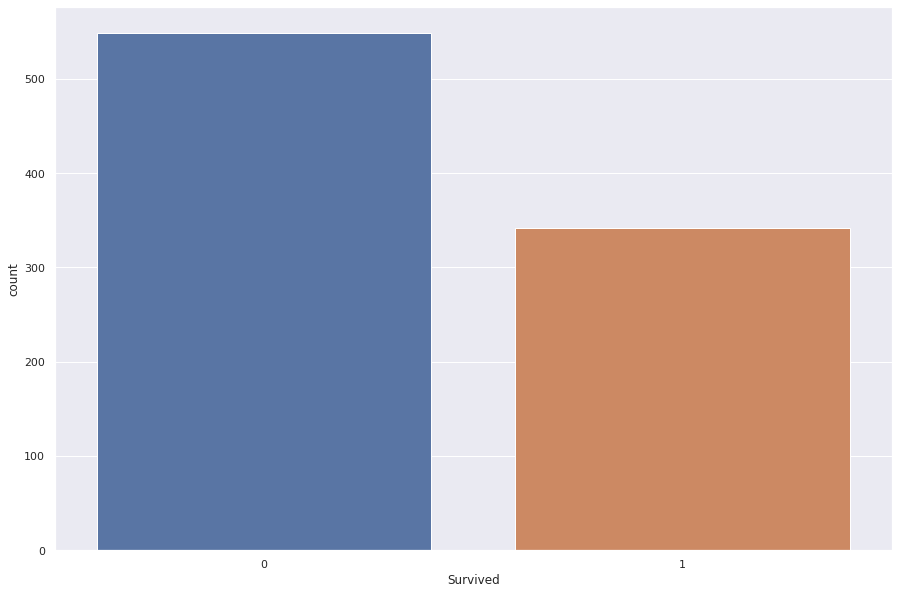

In [ ]:
#1.CountPlot: for categorical varaibles target variable is survived
sns.countplot(data['Survived'])
plt.show()


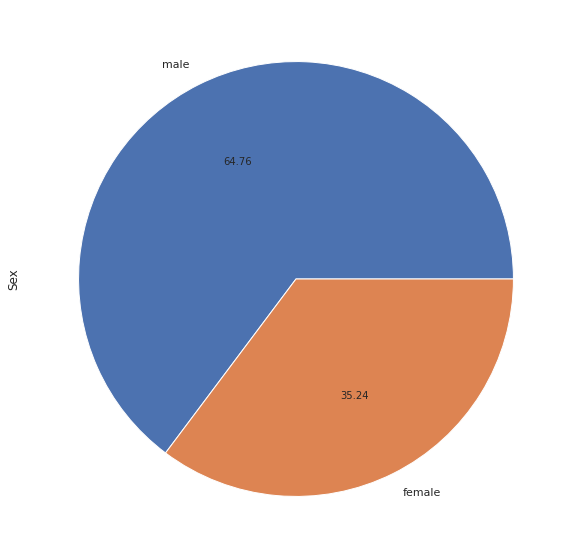

In [ ]:
#2.Pie Chart
data['Sex'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

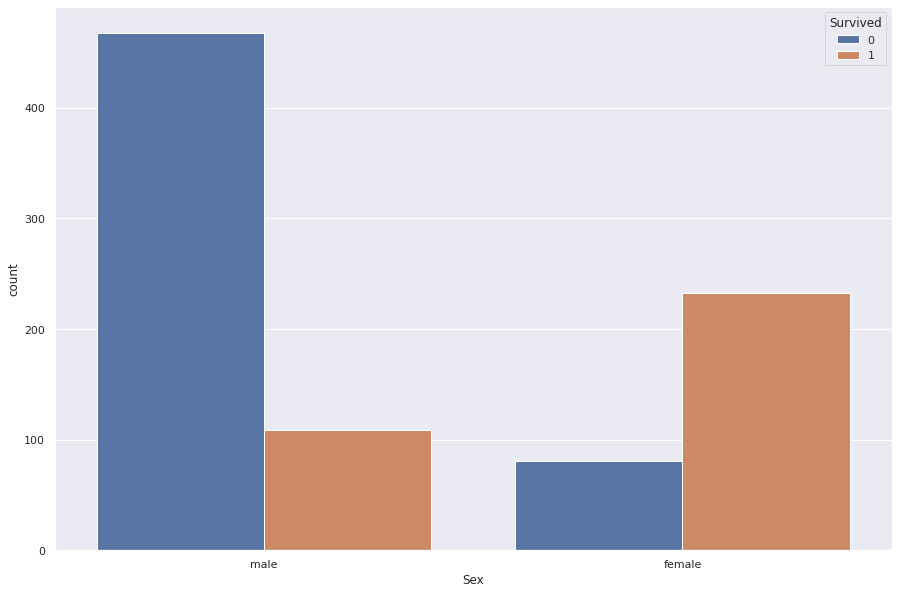

In [ ]:
sns.countplot(x ='Sex', hue = "Survived", data = data)
plt.show()

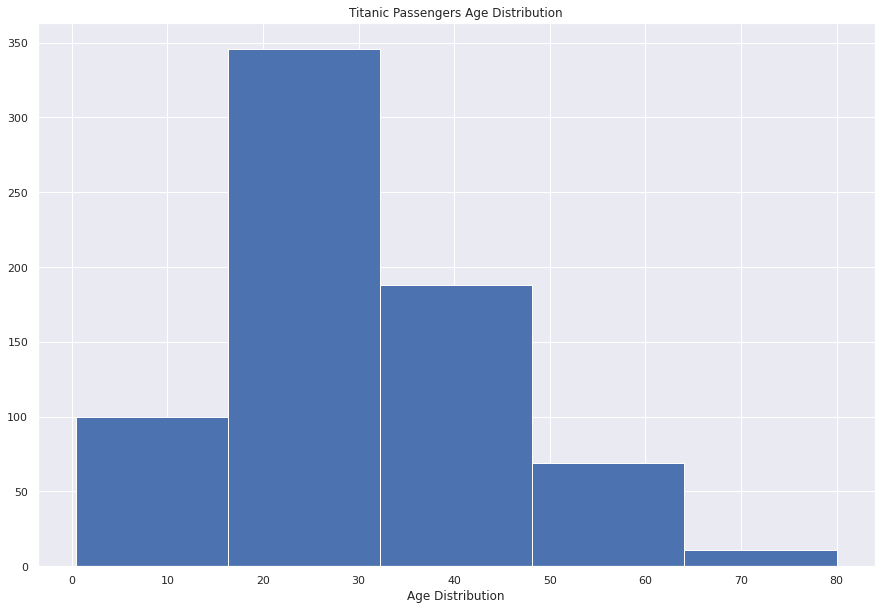

In [ ]:
#3.Histogram: explore frequency off the age column

plt.hist(data['Age'],bins = 5)
plt.xlabel("Age Distribution")
#plt.ylabel("y-axis")
plt.title('Titanic Passengers Age Distribution')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


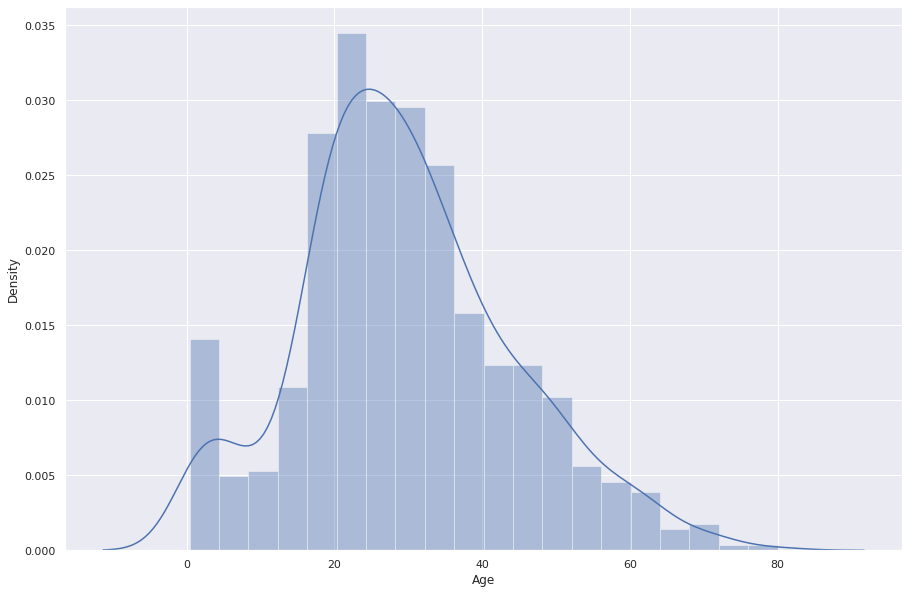

In [ ]:
sns.distplot(data['Age'])
plt.show()

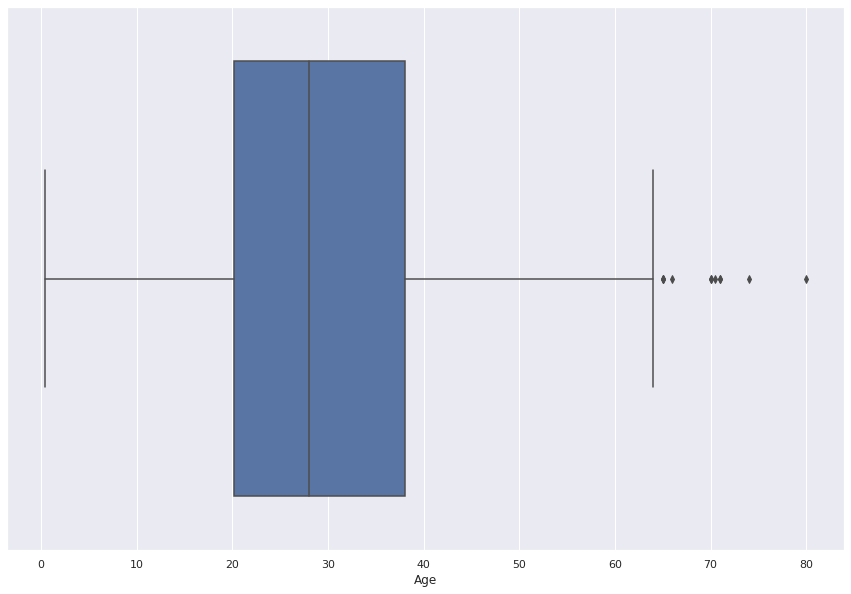

In [ ]:
sns.boxplot(x="Age",data=data)
plt.show()

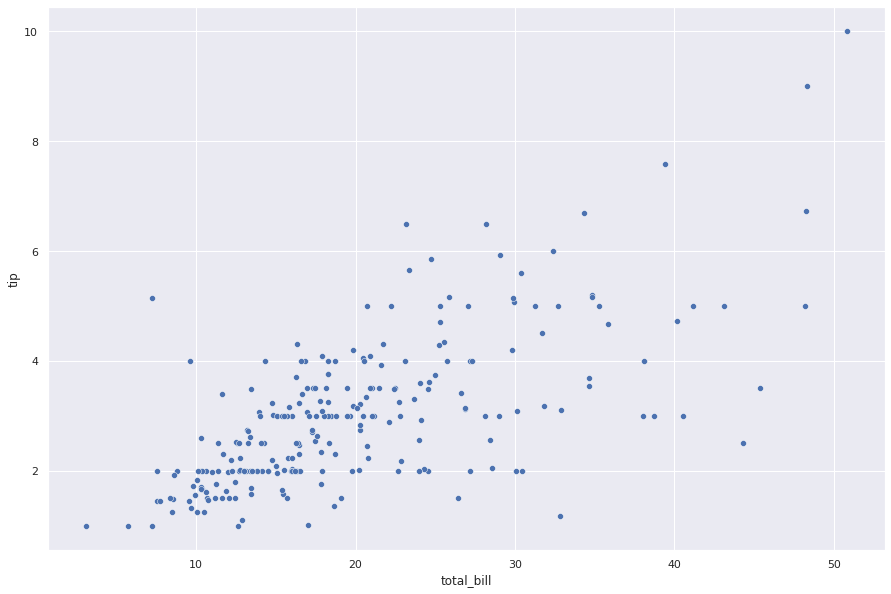

In [ ]:
#5.Scatter plot: explore the relationship between total bill and tip
sns.scatterplot(x=tips['total_bill'], y= tips['tip'])
plt.show()

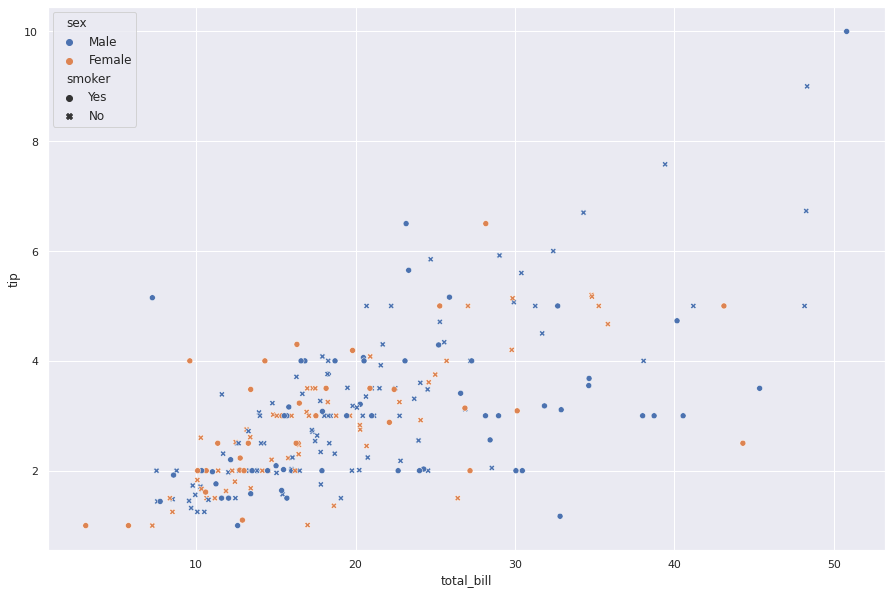

In [ ]:
#find the separate ratio of male and female with total bill and tip provided.
sns.scatterplot(x=tips['total_bill'], y=tips['tip'], hue =tips['sex'], style=tips['smoker'])
plt.show()

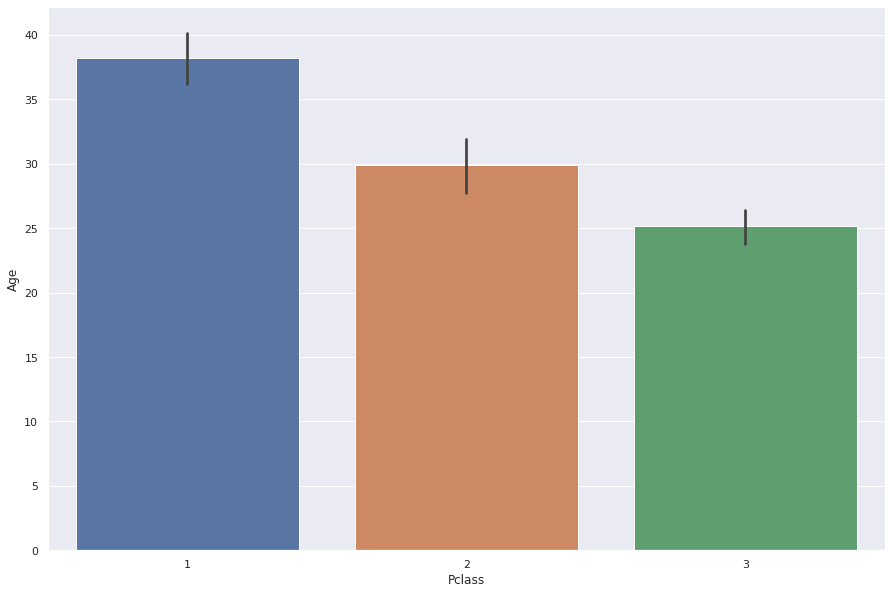

In [ ]:
#6.Barplot
#Compare the relationship between Age and passenger class
sns.barplot(x='Pclass',y='Age', data=data)
plt.show()

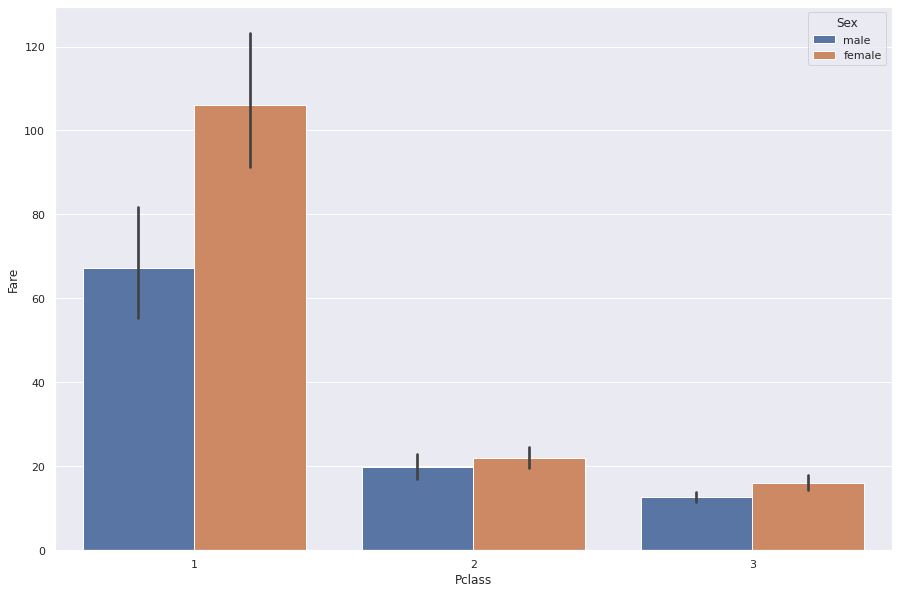

In [ ]:
#compare the fare paid by passengers of different gender in the various passenger classes
sns.barplot(x='Pclass',y='Fare', hue='Sex', data=data)
plt.show()

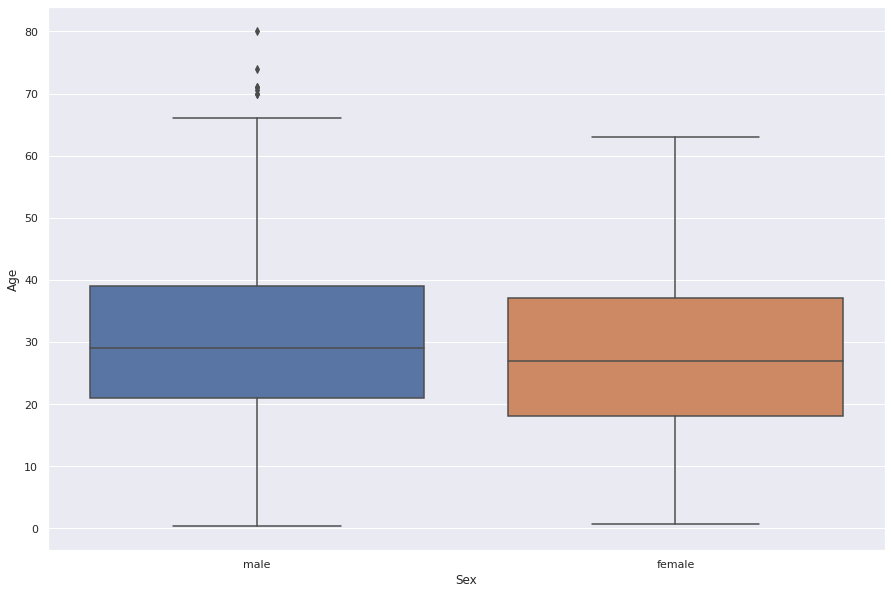

In [ ]:
#Box plot multivariate analysis
sns.boxplot(x='Sex',y='Age',data=data)
plt.show()

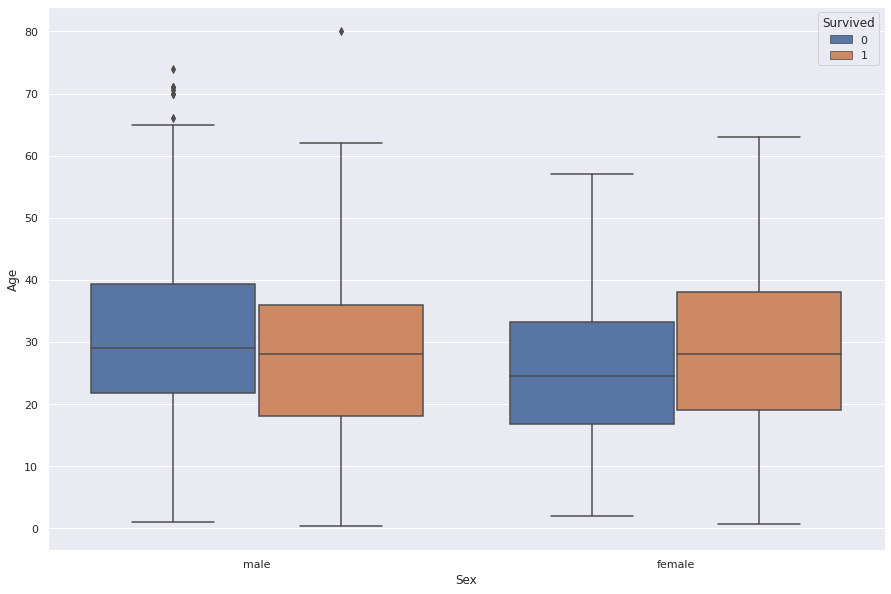

In [ ]:
#Box plot multivariate analysis
sns.boxplot(x='Sex',y='Age',hue='Survived',data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


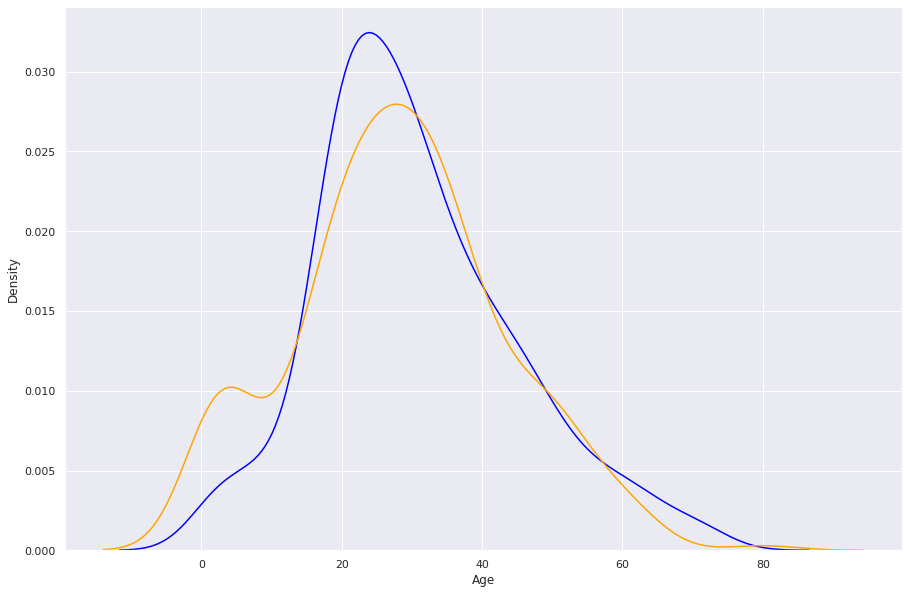

In [ ]:
#Distplot Multivariate analysis
sns.distplot(data[data['Survived'] == 0]['Age'], hist=False, color="blue") 
sns.distplot(data[data['Survived'] == 1]['Age'], hist=False, color="orange")
plt.show()

In [ ]:
#pandas crosstab is similar representation of the heatmap
pd.crosstab(data['Pclass'], data['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


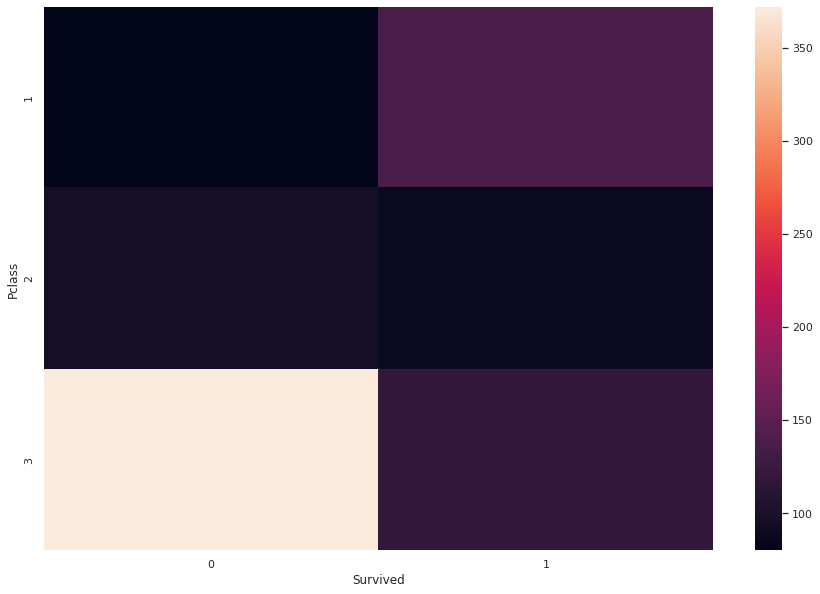

In [ ]:
#Heatmap= visual representation of the pandas cross tab
#How many passengers in the different categories died
sns.heatmap(pd.crosstab(data['Pclass'], data['Survived']))
plt.show()

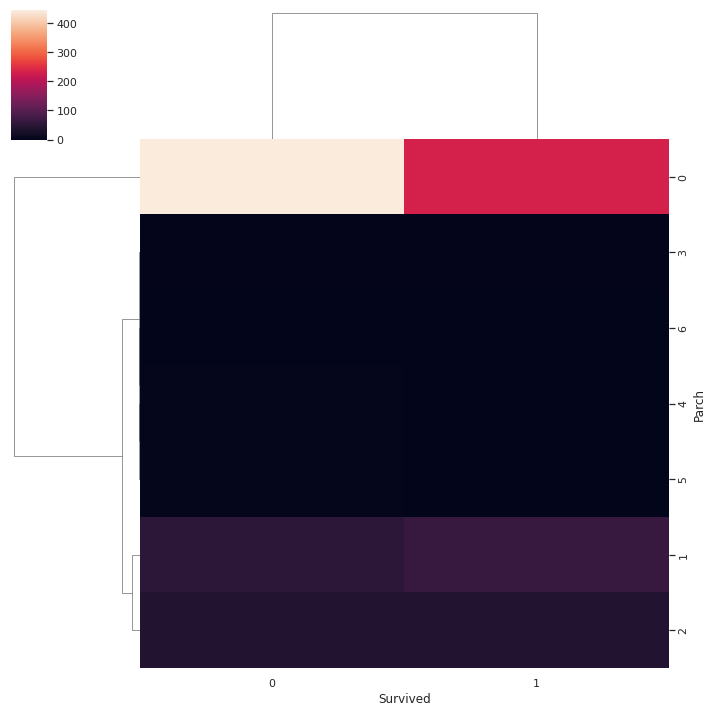

In [ ]:
sns.clustermap(pd.crosstab(data['Parch'], data['Survived']))
plt.show()

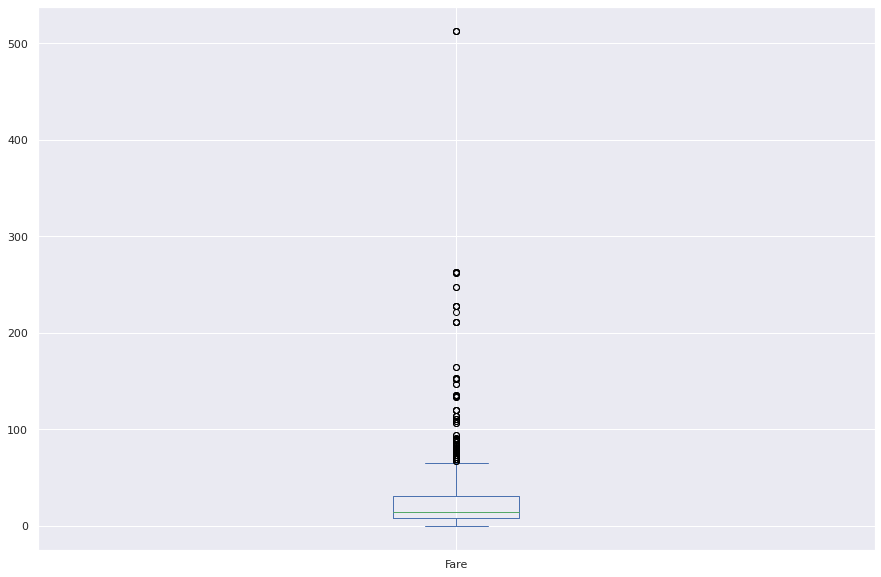

In [ ]:
data['Fare'].plot(kind='box')
plt.show()